In [1]:
import numpy as np
import scipy as sp
import networkx as nx
from Kmeans import kmeans
from normalized_spectral_clustering_shi import laplacian_matrix, similarity_matrix
from datasets import gaussian_mixture
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from spectral_clustering import spectral_clustering
from tqdm import tqdm

## Data Generation

[12.62527347  4.27736983]


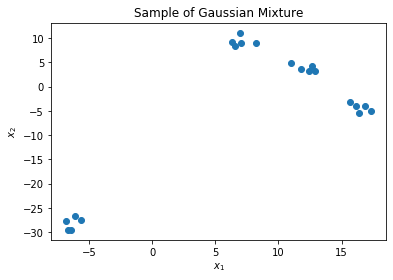

In [67]:
from datasets import gaussian_mixture

n_gaussians = 4
n_pts = 5
n = n_pts * n_gaussians
d = 2

data = gaussian_mixture(n_gaussians, n_pts, d, centroid_var=15)

data = data.T
print(data[0])

plt.scatter(*data.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Sample of Gaussian Mixture")
plt.show()

## Construct Transition Matrix


In [68]:
weights = similarity_matrix(data)
laplacian, degreeinv = laplacian_matrix(data)

p = degreeinv @ weights

## Distribution of the First Step
For a fixed point, in this case the first data point (2 dimensional), we can look at the first row of p as a finite distribution, and we can extrapolate which vertices the first data point may respond to.

However I don't know how to do that, so in a novel application of Central Limit Theorem, I will just multiply the first row by a large number and see what happens

In [69]:
j = 5 #number from 0 to n-1
x = p[j]*10000
for i in range(n):
    print(x[i])

2.0163844569822828e-14
2.760837850921617e-13
3.360682394478962e-06
9.498226667309504e-10
1.0814842167446513e-15
16.86705426733401
0.08888202191587385
5.446159037299476e-08
9956.969387075804
26.074673218853185
4.268966557046796e-36
3.4775062726315174e-38
5.270739703065239e-33
1.6223118844921534e-41
8.81147438178036e-45
4.175887579488343e-146
2.8340261717895056e-169
4.514726572498322e-134
2.3877551192247037e-143
1.2821423366789392e-168


Here, we see that vertices exhibit a clear preference to certain other vertices. Let's collect a set of vertices for each vertex, where we store vertices that are oft visited by the vertex indexing this set. We can interpret the scalar of 10000 to be 10000 "first steps." Let's first include vertices that were visited at least once, and see how the vertices organize themselves.

[5, 8, 9]


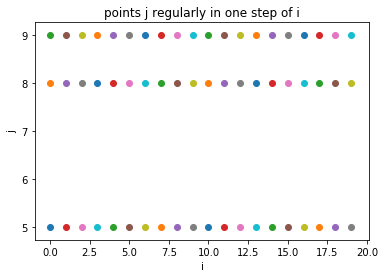

In [70]:
# Let A be a set of sets such that A[i] consists of the vertices that i visited at least once in 10000 first steps.
A=[]
for i in range(n):
    x= p[i]*10000
    A_i = []
    for j in range(n):
        if x[j] >= 1:
            A_i.append(j)
            plt.scatter(i,j)
    A.append(A_i)
    
print(A_i)    
plt.xlabel("i")
plt.ylabel("j")
plt.title("points j regularly in one step of i")
plt.show()

## Observations
vertex i appears in A[i] for all i

if vertex j appears in A[i], vertex i appears in A[j]
This is expected behavior, as the graph is undirected


there appear to be broader trends, how can we substantiate them precisely?
Questions:

If vertices x,y appear in set z, how likely is it that that (WLOG) vertices y, z appear in set x? Is there a lower bound on inclusion in set i that guarantees this for any given distribution?

